In [1]:
# This should be included at the top of every .ipynb file in the project
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parents[1]
sys.path.append(str(PROJECT_ROOT))

In [3]:

# Import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [4]:

# Charger le dataset nettoyé
data = pd.read_csv("../../data/KDDTrain+.csv")

In [5]:
# Vérifier les 5 premières lignes
print(data.head())

   duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.10   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                   

In [6]:
# Sélection des colonnes numériques
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
print(f"Features numériques : {numeric_features.tolist()}")

Features numériques : ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
# Calculer Q1, Q3 et IQR pour chaque feature numérique
Q1 = data[numeric_features].quantile(0.25)
Q3 = data[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Identifier les outliers
train_outliers_iqr = ((data[numeric_features] < (Q1 - 1.5 * IQR)) |
                      (data[numeric_features] > (Q3 + 1.5 * IQR)))

# Nombre total d’outliers
print(f"Nombre total d'outliers selon IQR sur le train : {train_outliers_iqr.sum().sum()}")


Nombre total d’outliers selon IQR sur le train : 228659


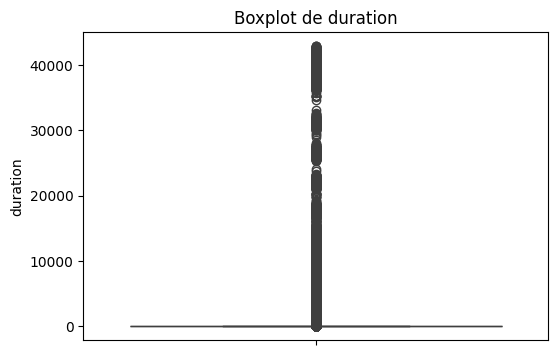

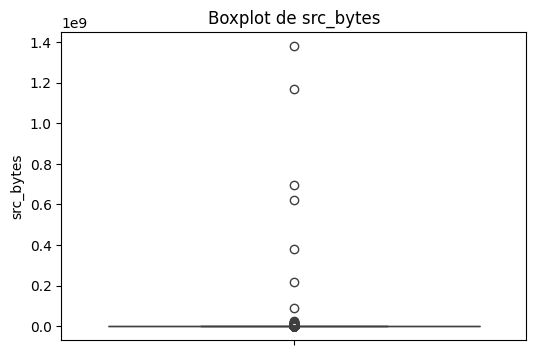

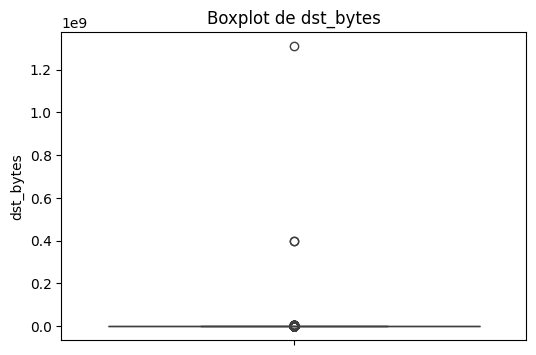

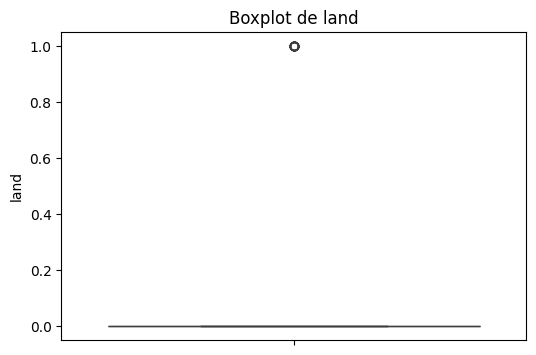

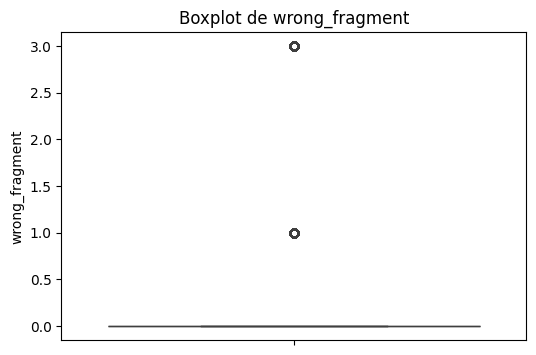

In [12]:
# Boxplots pour visualiser les outliers sur les 5 premières features
for col in numeric_features[:5]:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

In [17]:
# Nombre d'outliers par feature
for col in numeric_features:
    outliers_feature = train_outliers_iqr[col].sum()
    print(f"{col} : {outliers_feature} outliers ({100*outliers_feature/len(data):.2f}%)")

duration : 10018 outliers (7.95%)
src_bytes : 13840 outliers (10.99%)
dst_bytes : 23579 outliers (18.72%)
land : 25 outliers (0.02%)
wrong_fragment : 1090 outliers (0.87%)
urgent : 9 outliers (0.01%)
hot : 2671 outliers (2.12%)
num_failed_logins : 122 outliers (0.10%)
logged_in : 0 outliers (0.00%)
num_compromised : 1286 outliers (1.02%)
root_shell : 169 outliers (0.13%)
su_attempted : 80 outliers (0.06%)
num_root : 649 outliers (0.52%)
num_file_creations : 287 outliers (0.23%)
num_shells : 47 outliers (0.04%)
num_access_files : 371 outliers (0.29%)
num_outbound_cmds : 0 outliers (0.00%)
is_host_login : 1 outliers (0.00%)
is_guest_login : 1187 outliers (0.94%)
count : 3157 outliers (2.51%)
srv_count : 12054 outliers (9.57%)
serror_rate : 0 outliers (0.00%)
srv_serror_rate : 0 outliers (0.00%)
rerror_rate : 16190 outliers (12.85%)
srv_rerror_rate : 16206 outliers (12.86%)
same_srv_rate : 0 outliers (0.00%)
diff_srv_rate : 7788 outliers (6.18%)
srv_diff_host_rate : 28399 outliers (22.54%